<b><h3>Train a Baseline ML Model (Yield Prediction) using RandomForestRegressor</b></h3>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load your combined dataset
df = pd.read_csv("final_combined_dataset.csv")

# Select features (climate + NDVI) and target (yield)
X = df[['Temperature_C', 'Humidity_%', 'Rainfall_mm', 'NDVI_mean']]
y = df['Yield_kg_per_ha']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 15855.89346995167
R2 Score: -0.002039649643332586


<b><h3>Climate Resilience Simulation</b></h3>

In [3]:
# Example: simulate 10% less rainfall
X_test_simulated = X_test.copy()
X_test_simulated['Rainfall_mm'] *= 0.9

# Predictions
y_pred_original = rf.predict(X_test)
y_pred_simulated = rf.predict(X_test_simulated)

# Averages
original_mean = y_pred_original.mean()
simulated_mean = y_pred_simulated.mean()

# Yield loss calculation
yield_loss = original_mean - simulated_mean
yield_loss_percent = (yield_loss / original_mean) * 100

print("Avg Yield Original:", round(original_mean, 2))
print("Avg Yield with -10% Rainfall:", round(simulated_mean, 2))
print("Yield Loss (kg/ha):", round(yield_loss, 2))
print("Yield Loss (%):", round(yield_loss_percent, 2), "%")

Avg Yield Original: 12745.8
Avg Yield with -10% Rainfall: 12733.64
Yield Loss (kg/ha): 12.16
Yield Loss (%): 0.1 %


<b><h3>Sustainable Crop Recommendation</b></h3>

In [4]:
# Group crops and compare average yield under forecast conditions
df['Predicted_Yield'] = rf.predict(df[['Temperature_C', 'Humidity_%', 'Rainfall_mm', 'NDVI_mean']])

crop_recommendation = df.groupby('Crop')['Predicted_Yield'].mean().sort_values(ascending=False)
print("Recommended Crops (High to Low Yield Potential):")
print(crop_recommendation)

Recommended Crops (High to Low Yield Potential):
Crop
Cauliflowers and broccoli                                       15338.078339
Coconuts, in shell                                              13647.157595
Coffee, green                                                   13647.157595
Maize (corn)                                                    13647.157595
Peas, green                                                     13647.157595
Potatoes                                                        13647.157595
Rice                                                            13647.157595
Sugar cane                                                      13647.157595
Tea leaves                                                      13647.157595
Wheat                                                           13647.157595
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)    11389.906998
Apples                                                           7937.242144
Areca nuts            

<b><h3>Feature Importance</b></h3>

<b><h4>Horizontal Bar Plot with Seaborn</b></h4>

C:\Users\thris\AppData\Local\Temp\ipykernel_32172\3569856755.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


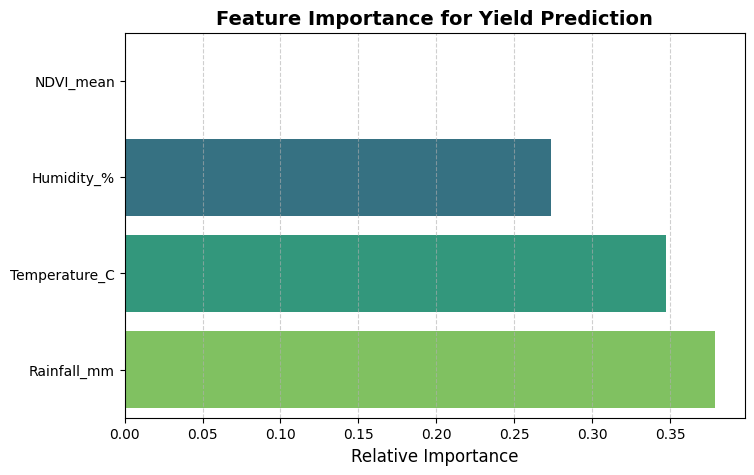

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to dataframe for seaborn
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=True)

# Better plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")

plt.title("Feature Importance for Yield Prediction", fontsize=14, weight='bold')
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<b><h4>Circular (Donut) Plot</b></h4>

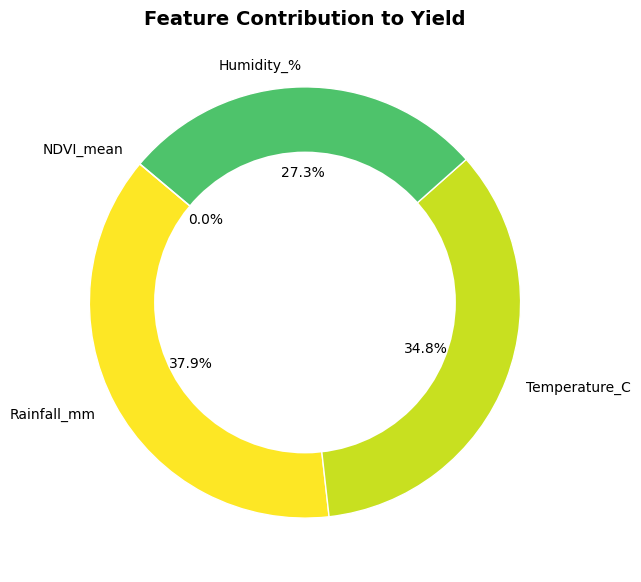

In [6]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(7,7))
colors = plt.cm.viridis(feat_imp.values / max(feat_imp.values))

# Donut chart
plt.pie(feat_imp, labels=feat_imp.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Feature Contribution to Yield", fontsize=14, weight='bold')
plt.show()

<b><h4>SHAP Beeswarm Plot (Explainable AI – XAI)</b></h4>

In [8]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
   -- ------------------------------------- 1.0/15.6 MB 3.1 MB/s eta 0:00:05
   ----- ---------------------------------- 2.1/15.6 MB 4.2 MB/s eta 0:00:04
   ------ --------------------------------- 2.6/15.6 MB 3.5 MB/s eta 0:00:04
   -------- ------------------------------- 3.1/15.6 MB 3.2 MB/s eta 0:00:04
   ---------- ----------------------------- 3.9/15.6 MB 3.4 MB/s eta 0:00:04
   ------------ --------------------------- 4.7/15.6 MB 3.4 MB/s eta 0:00:04
   --------------- ------------------------ 6.0/15.6 MB 3.8 MB/s eta 0:00:03
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [11]:
pip install numpy==1.26.4 --upgrade --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


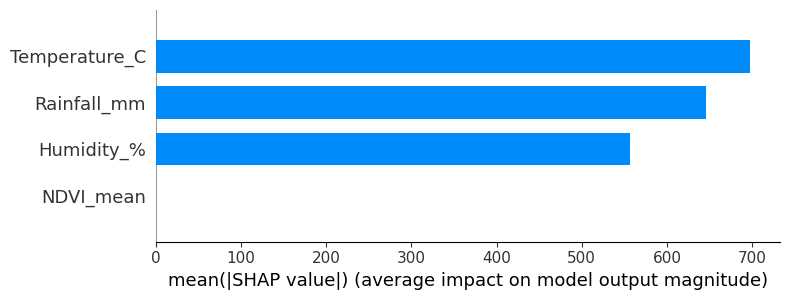

In [7]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Beeswarm plot
shap.summary_plot(shap_values, X_test, plot_type="bar")